# Task

Sergei Mikhailovich Prokudin-Gorskii (1863-1944), a pioneering photographer extensively traveled the Russian Empire from 1909 to 1915, capturing thousands of images. Employing an early color technology, he recorded three images of each scene onto glass plates using red, green, and blue filters. 

Your task is to take Gorskii glass plate RGB color channels and produce a color image with as few visual artifacts as possible (ignore the artifacts at the image boundaries). To do this, you will need to read the image file, extract the three color channel images, place them on top of each other, and align them so that they form a single RGB color image. You will need to implement this in Python.

**Note** that the channel order for all files from top to bottom is BGR, not RGB!

In [2]:
import cv2 as cv
from matplotlib import pyplot as plt 
import numpy as np

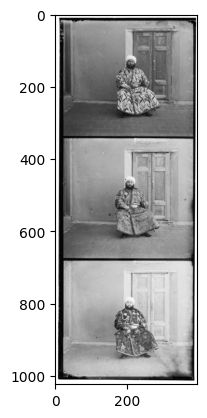

In [3]:
ausid = 12345 # use last five digits of your ausid, e.g 83452
if ausid % 3 == 0: filename = '00153v.jpg'
if ausid % 3 == 1: filename = '00149v.jpg'
if ausid % 3 == 2: filename = '00351v.jpg'
img = cv.imread(filename, cv.IMREAD_GRAYSCALE)

plt.imshow(img, cmap='gray')

## Task 1
Given an image `img` with three grayscale channels stacked vertically (Blue, Green, Red), write code to first obtain its shape `(h, w)` and divide the height into three equal parts, then extract each channel (`b`, `g`, `r`) from the corresponding slice of rows. Merge the channels back into a color image using both `cv.merge([b, g, r])` or `np.dstack((b, g, r))` and finally show the color image. 

You will notice that the color image has artifacts because the color channels are not aligned.


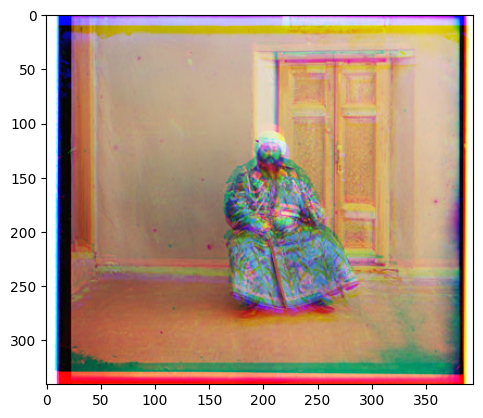

In [4]:
h,w = img.shape
h = int(h/3)

b = img[0:h, :]
g = img[h:2*h, :]
r = img[2*h:3*h, :]
cv.merge([b,g,r])
stacked = np.dstack((b,g,r))
plt.imshow(cv.cvtColor(stacked, cv.COLOR_BGR2RGB))

## Task 2

To better visualize the misalignment, crop 100 × 100 regions from the Blue, Green, and Red channel images at locations containing edges, and display them side by side in three subplots using `plt.subplot`, with each subplot showing the corresponding patch in grayscale.

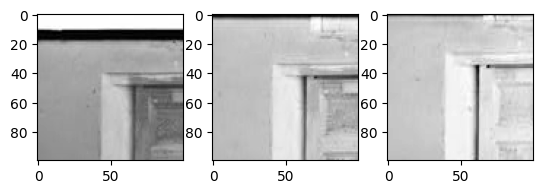

In [6]:
plt.subplot(1,3,1)
plt.imshow(b[0:100, 150:250], cmap='gray')
plt.subplot(1,3,2)
plt.imshow(g[0:100, 150:250], cmap='gray')
plt.subplot(1,3,3)
plt.imshow(r[0:100, 150:250], cmap='gray')

## Task 3
Fix one channel and shift the other channels to align them with the fixed channel. Apply a shift kernel to adjust the channels, then stack them and display the resulting image.

In [ ]:
k = np.zeros((7,7))
k[3,0] = 1

g_ = cv.filter2D(g, cv.CV_8U, k)
r_ = cv.filter2D(r, cv.CV_8U, k)

k = np.zeros((7,7))
k[0,3] = 1
g_ = cv.filter2D(g_, cv.CV_8U, k)
g_ = cv.filter2D(g_, cv.CV_8U, k)
r_ = cv.filter2D(r_, cv.CV_8U, k)
r_ = cv.filter2D(r_, cv.CV_8U, k)
r_ = cv.filter2D(r_, cv.CV_8U, k)
r_ = cv.filter2D(r_, cv.CV_8U, k)

plt.figure()
stacked = np.dstack((b,g_,r_))
plt.imshow(cv.cvtColor(stacked, cv.COLOR_BGR2RGB))